# Vizualizace

## Modul `matplotlib`


In [191]:
# !pip install matplotlib # Instalace pro Windows

# !pip3 install matplotlib # Instalace pro Mac OS nebo Linux

In [192]:
import matplotlib

## První graf

* Importujeme si objekt pyplot z knihovny `matplotlib` a pojmenujeme si ho jako `plt`.
* Použijeme funkci `pandas.read_csv()`, kterou si necháme data stáhnout rovnou z internetu.
* Protože `CSV` soubor nemá hlavičku, musíme si sloupce sami pojmenovat a určit, který bude `DataFrame index`.
* Necháme si `DataFrame` vykreslit do podoby grafu.
* Obrázek s grafem si zobrazíme.

In [193]:
import pandas
import matplotlib.pyplot as plt

In [194]:
url = "https://kodim.cz/cms/assets/analyza-dat/python-data-1/python-pro-data-1/vizualizace/vizualizace/ucet.csv"

ucet = pandas.read_csv(url, names=["datum", "pohyb"], index_col="datum")
ucet

,pohyb
datum,
2019-03-01,746
2019-03-02,52
2019-03-03,-749
2019-03-04,-63
2019-03-05,71
2019-03-06,958
2019-03-07,157
2019-03-08,-1223
2019-03-09,-1509


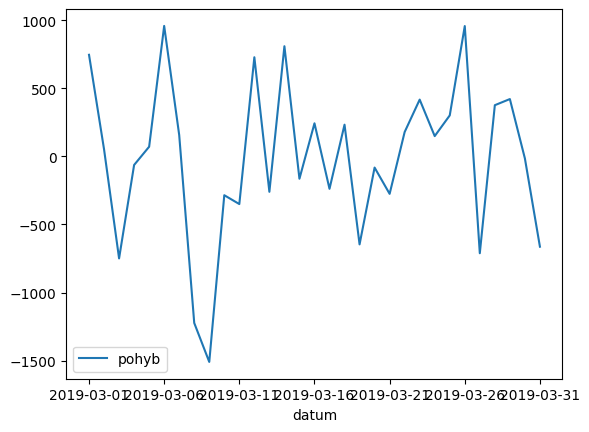

In [195]:
ucet.plot()
plt.show()

Graf zůstatků na účtě.

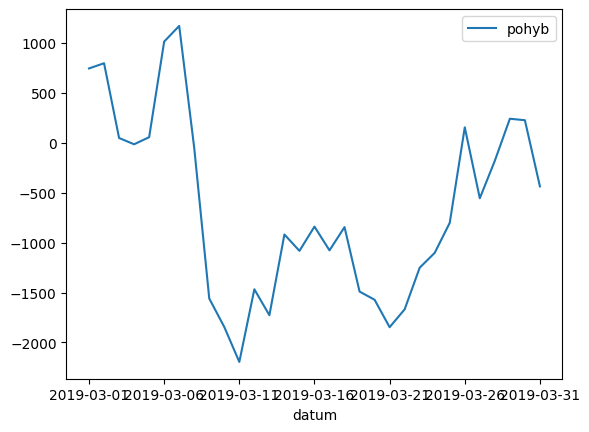

In [196]:
ucet.cumsum().plot()  # kumulativní suma

plt.show()

## Možnosti formátování

Dokumentace: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html

Tutoriál: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


Vyrobíme z pohybů na účtu sloupcový graf s mřížkou ve žluté barvě.

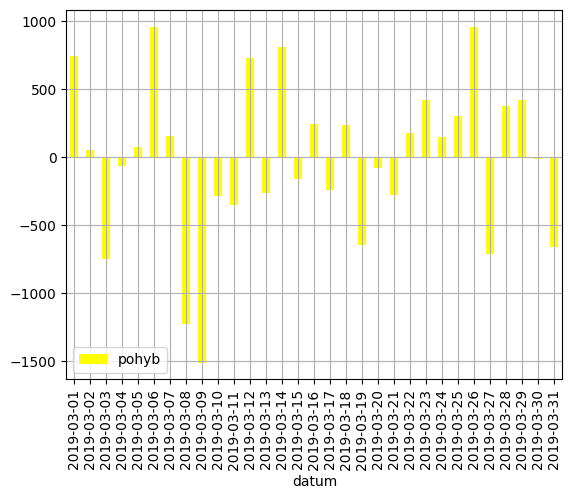

In [198]:
ucet.plot(kind="bar", color="yellow", grid=True)

plt.show()

### Barvy

<https://matplotlib.org/stable/tutorials/colors/colors.html>

In [199]:
color = "peachpuff"  # a named color
color = "#0f0f0f"  # RGB hex string
color = (0.1, 0.2, 0.5)  # RGB
color = "0"  # greyscale, black = 0, white = 1
color = "b"  # blue, k = black
color = "C4"  # Cn notation


# https://blog.xkcd.com/2010/05/03/color-survey-results/

### Podmíněné formatovaní

<Axes: xlabel='datum'>

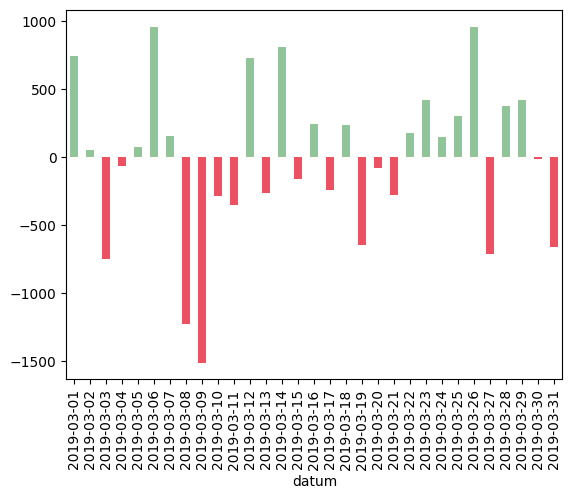

In [214]:
ucet["pohyb"].plot(kind="bar", color = color)

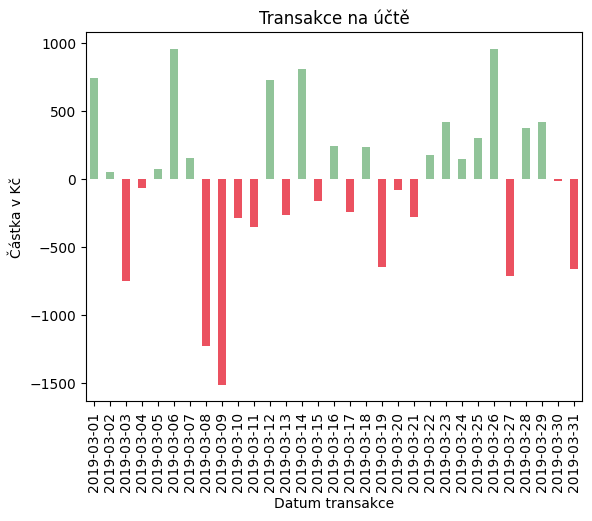

In [215]:

ucet["pohyb"].plot(
    kind="bar",
    color=color,
    width=0.5,
    ## Popisky
    ylabel= "Částka v Kč",
    xlabel="Datum transakce",
    title="Transakce na účtě",
)

plt.show()

### plt.figure()

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


<function matplotlib.pyplot.show(close=None, block=None)>

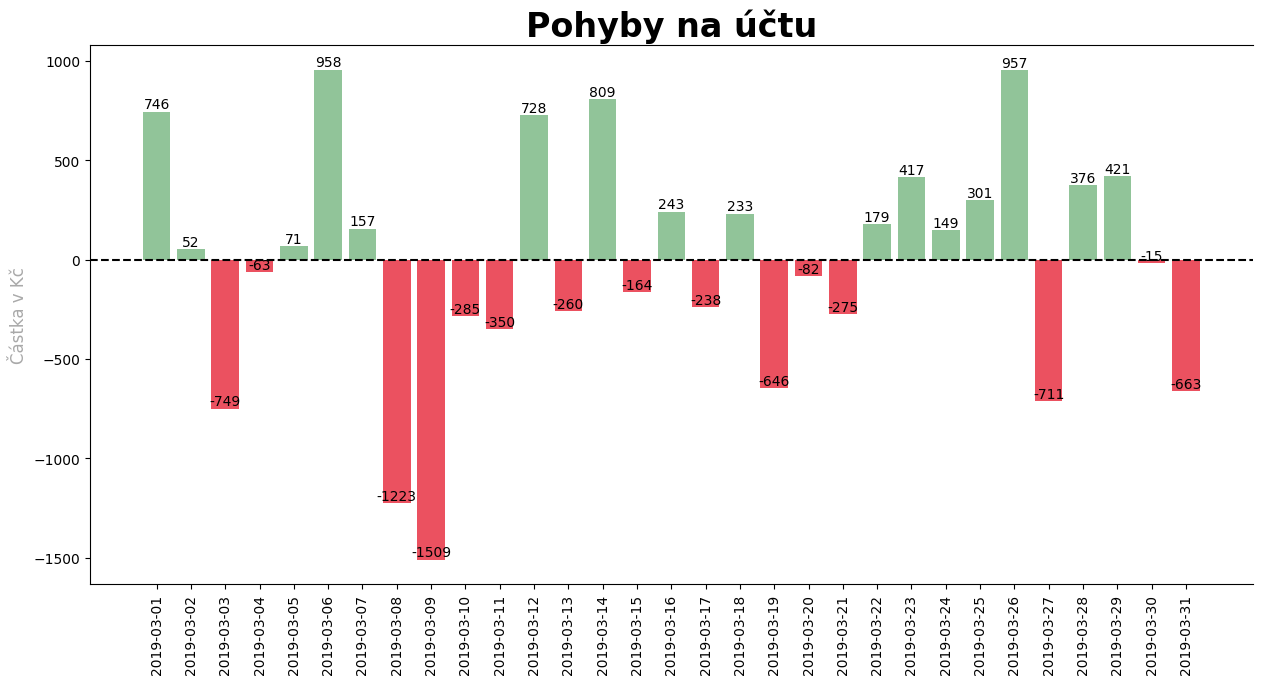

In [216]:
color = ["#EB5160" if value < 0 else "#91C499" for value in ucet["pohyb"]]

fig, ax = plt.subplots(figsize=(15, 7))
print(type(fig))
print(type(ax))


ax.set_title("Pohyby na účtu", fontweight="bold", fontsize=24)

ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("Částka v Kč", color="darkgrey", fontsize=12)
ax.bar(ucet.index, ucet.pohyb, color=color)
plt.axhline(y=0, color="k", linestyle="--")

## Popisky hodnot v grafu
for i in range(len(ucet.pohyb)):
    plt.annotate(
        str(ucet.pohyb[i]), xy=(ucet.index[i], ucet.pohyb[i]), ha="center", va="bottom"
    )

ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)

plt.show

![matplotlib-anatomy](assets/anatomy.png)

### Style sheets

In [204]:
# https://matplotlib.org/stable/gallery/style_sheets/index.html
# https://towardsdatascience.com/how-to-create-and-use-custom-matplotlib-style-sheet-9393f498063

plt.rcParams["figure.figsize"] = [15, 5]
plt.style.use(['default']) # default, grayscale


## Typy grafů

Typ grafu se v metodě `plot` specifikuje pomocí argumentu `type`. 

Základní typy grafů, které se hojně používají mohou být například tyto:

* plot() - [Bodový graf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html),
* bar() - [Sloupcový graf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html),
* hist() - [Histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html),
* boxplot() - [Krabicový graf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html).


Výběr vhodného typu vizualizace se odvíjí od toho, jaká data zobrazujeme. 

Rady, jak vybrat vhodný typ vizualizace, najdete třeba v [tomto článku](https://blog.hubspot.com/marketing/types-of-graphs-for-data-visualization).


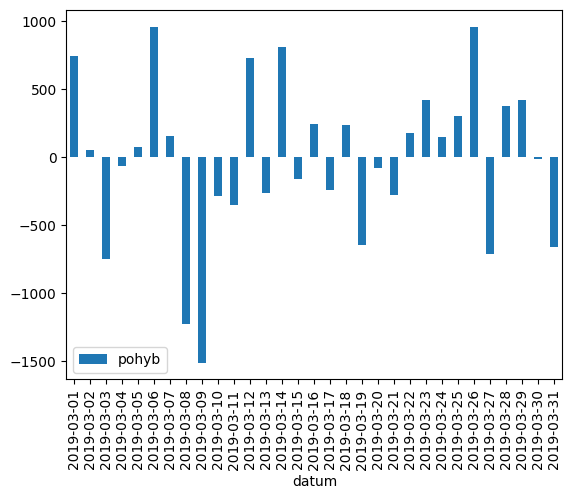

In [217]:
ucet.plot.bar()
plt.show()

### Histogramy

Zobrazuje četnost hodnot z nějakého datasetu.

In [206]:
# Následující seznam obsahuje výšku 64 náhodných mužů v České republice, měřeno v centimetrech.

muzi = pandas.Series(
    [
        179.3,
        183.7,
        181.4,
        176.0,
        183.6,
        184.7,
        163.4,
        180.3,
        167.5,
        166.8,
        173.5,
        172.5,
        173.0,
        177.6,
        176.0,
        179.5,
        182.6,
        172.0,
        183.2,
        177.0,
        176.2,
        175.7,
        174.3,
        180.3,
        184.9,
        171.1,
        182.3,
        169.7,
        181.3,
        188.8,
        176.8,
        159.0,
        180.3,
        198.5,
        185.8,
        191.0,
        170.9,
        196.0,
        183.3,
        183.0,
        189.9,
        184.8,
        184.0,
        183.1,
        184.0,
        190.7,
        191.7,
        187.8,
        177.5,
        177.5,
        189.2,
        188.4,
        195.0,
        204.2,
        180.2,
        181.3,
        178.2,
        182.6,
        172.1,
        175.7,
        180.7,
        181.2,
        165.0,
        188.6,
    ]
)

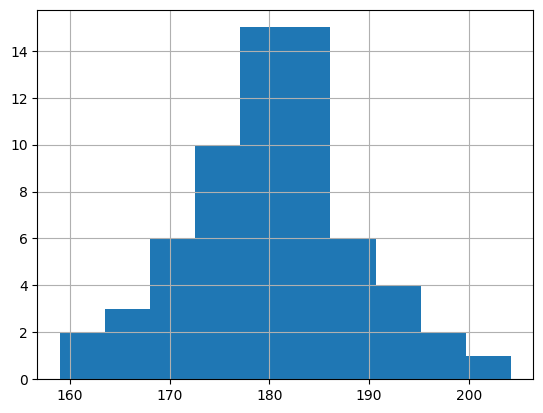

In [207]:
muzi.hist()
plt.show()

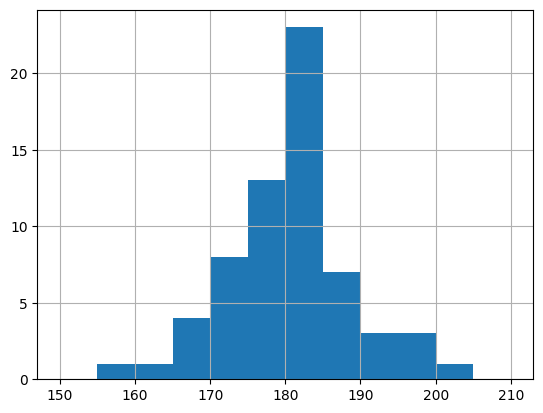

In [208]:
## Rozdělení po 5 centimetrech

muzi.hist(bins=[150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210])

plt.show()

### Krabicový graf

Krabicový graf graficky znázorňuje medián a kvartily naměřených hodnot. 


![Box plot explained](assets/boxplot-example.png)


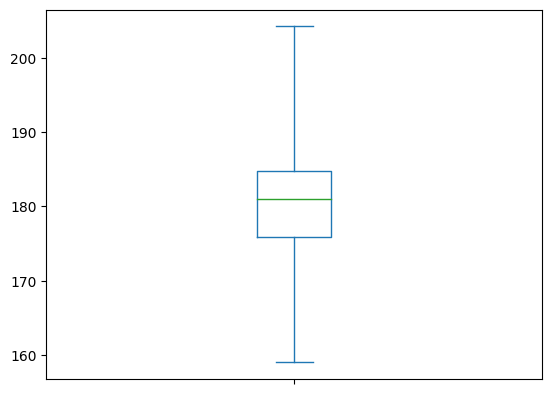

In [209]:
muzi.plot(
    kind="box",
    whis=[
        0,
        100,
    ],  # whiskers: the vertical lines extending to the most extreme, non-outlier data points.
)

plt.show()

## Další možnosti vytvoření grafu
# df.plot.box()
# df.boxplot()

Krabicové grafy jsou užitečné především pro porovnání dvou různých měření. 

Přidejme si druhou datovou sadu představující naměřené výšky žen.

In [210]:
zeny = pandas.Series(
    [
        172.0,
        169.0,
        166.8,
        164.6,
        172.7,
        171.5,
        167.0,
        167.0,
        168.3,
        184.7,
        166.0,
        160.0,
        168.8,
        165.8,
        173.5,
        163.0,
        168.9,
        158.4,
        166.4,
        169.4,
        174.2,
        175.6,
        167.2,
        168.0,
        171.5,
        168.8,
        168.9,
        174.1,
        169.0,
        170.7,
        156.3,
        174.8,
        169.1,
        161.4,
        172.5,
        166.1,
        171.5,
        163.9,
        164.5,
        169.0,
        168.5,
        163.3,
        169.5,
        167.4,
        175.5,
        165.0,
        166.6,
        158.9,
        164.5,
        168.7,
        161.6,
        175.8,
        179.0,
        167.9,
        161.1,
        167.6,
        165.9,
        165.2,
        176.0,
        179.4,
        160.1,
        163.8,
        177.7,
        160.4,
    ]
)

Vytvoříme DataFrame.

In [212]:
vysky = muzi.to_frame(name="muži")
vysky["ženy"] = zeny

## Alternativní postup vytvoření dataframu
vysky = pandas.DataFrame(columns = ["Muzi", "Zeny"])
vysky["Muzi"] = muzi
vysky["Zeny"] = zeny

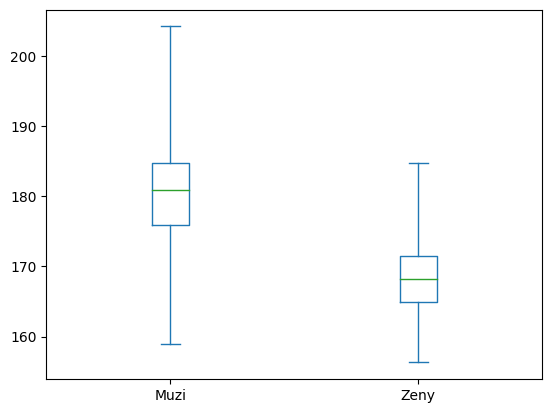

In [213]:
vysky.plot(kind="box", whis=[0, 100])

plt.show()

--- 

Více o boxplotu: <https://www.simplypsychology.org/boxplots.html>

Typické míry střední hodnoty jsou: 
- aritmetický průměr – průměr všech hodnot ve vzorku (počítáno podle hodnot), 
- medián – hodnota, které se nachází ve středu vzorku (počítáno podle pozic), a 
- modus – nejčastěji se vyskytující hodnota (počítáno podle frekvencí).

Typické míry rozptylu jsou: 
- kvartily – každá ze tří hodnot, které rozdělují tříděné údaje na čtyři stejné části tak, aby každá část představovala jednu čtvrtinu zkoumaného vzorku: 

- První kvartil (neboli dolní kvartil) odděluje nejnižších 25 % dat (25. percentil), 
- druhý kvartil (neboli střední) odděluje data v polovině (50. percentil), a 
- třetí kvartil (neboli horní kvartil) odděluje nejvyšších 25 % dat (75. percentil).

Typické míry extrémů jsou: 
- minimum – nejmenší číslo vzorku, a 
- maximum – největší číslo vzorku.